# Analysis of Airplane Crashes

In [4]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Data Import and Cleaning:

Import the dataset using Pandas.

Clean and preprocess the data, addressing missing values and categorizing data as needed.
Convert dates and other relevant fields to appropriate formats.

In [3]:
from google.colab import files
uploaded = files.upload()

Saving AirplaneCrashesandFatalitiesupto2023.zip to AirplaneCrashesandFatalitiesupto2023.zip


In [6]:
!unzip AirplaneCrashesandFatalitiesupto2023.zip

Archive:  AirplaneCrashesandFatalitiesupto2023.zip
   creating: Airplane Crashes and Fatalities upto 2023/Airplane Crashes and Fatalities upto 2023/
  inflating: Airplane Crashes and Fatalities upto 2023/Airplane Crashes and Fatalities upto 2023/Airplane_Crashes_and_Fatalities.csv  


In [7]:
data = pd.read_csv('/content/Airplane Crashes and Fatalities upto 2023/Airplane Crashes and Fatalities upto 2023/Airplane_Crashes_and_Fatalities.csv', encoding='latin1')

In [6]:
data.head()

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,9/7/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,7/12/1912,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4998 non-null   object 
 1   Time                   3486 non-null   object 
 2   Location               4994 non-null   object 
 3   Operator               4988 non-null   object 
 4   Flight #               1329 non-null   object 
 5   Route                  4221 non-null   object 
 6   AC Type                4983 non-null   object 
 7   Registration           4724 non-null   object 
 8   cn/ln                  4330 non-null   object 
 9   Aboard                 4980 non-null   float64
 10  Aboard Passangers      4769 non-null   float64
 11  Aboard Crew            4772 non-null   float64
 12  Fatalities             4990 non-null   float64
 13  Fatalities Passangers  4756 non-null   float64
 14  Fatalities Crew        4757 non-null   float64
 15  Grou

In [ ]:
data.isnull().sum()

,0
Date,0
Time,1512
Location,4
Operator,10
Flight #,3669
Route,777
AC Type,15
Registration,274
cn/ln,668
Aboard,18


In [9]:
df = data.copy()

In [10]:
df.duplicated().sum()

0

In [9]:
df.head()

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,9/7/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,7/12/1912,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [10]:
df.isnull().sum()

,0
Date,0
Time,1512
Location,4
Operator,10
Flight #,3669
Route,777
AC Type,15
Registration,274
cn/ln,668
Aboard,18


In [11]:
df.columns

Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'AC Type',
       'Registration', 'cn/ln', 'Aboard', 'Aboard Passangers', 'Aboard Crew',
       'Fatalities', 'Fatalities Passangers', 'Fatalities Crew', 'Ground',
       'Summary'],
      dtype='object')

In [11]:
df.columns = df.columns.str.strip()

In [12]:
df.dropna(subset=['Location'], axis = 0, inplace=True)
df.dropna(subset=['Summary'], axis = 0, inplace=True)
df.dropna(subset=['Operator'], axis = 0, inplace=True)
df.dropna(subset=['AC Type'], axis = 0, inplace=True)
df.dropna(subset=['Fatalities'],axis = 0, inplace=True)
df.dropna(subset=['Aboard'],axis = 0, inplace=True)
df.dropna(subset=['Ground'],axis = 0, inplace=True)




In [13]:
df.drop(columns=['Flight #'], inplace=True)

Since there are many unknowns in different fields, I decided to leave the rest of the unknown data in the original dataframe, and remove them only in copies where I will analyze a certain parameter

In [14]:
df['Registration'] = df['Registration'].fillna('Unknown')
df['cn/ln'] = df['cn/ln'].fillna('Unknown')


df

,Date,Time,Location,Operator,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,Unknown,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
2,7/12/1912,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,Unknown,Unknown,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,Unknown,Unknown,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),Unknown,Unknown,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...
5,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,Zeppelin L-2 (airship),Unknown,Unknown,30.0,NaN,NaN,30.0,NaN,NaN,0.0,Hydrogen gas which was being vented was sucked...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,11/21/2022,10:15,"Medellín, Colombia",AeroPaca SAS,Medellín - Pizarro,Piper PA-31-350 Navajo Chieftain,HK-5121,31-7652004,8.0,6.0,2.0,8.0,6.0,2.0,0.0,The plane was chartered to carry a team of six...
4994,1/15/2023,10:50,"Pokhara, Nepal",Yeti Airlines,Kathmandu - Pokhara,ATR 72-500-72-212-A,9NANC,754,72.0,68.0,4.0,72.0,68.0,4.0,0.0,"Before approach, the pilot requested a change ..."
4995,9/16/2023,NaN,"Barcelos, Brazil",Manaus Aerotaxi,NaN,Embraer EMB-110P1 Bandeirante,PT-SOG,110490,14.0,12.0,2.0,14.0,12.0,2.0,0.0,The air taxi crashed in heavy rain while attem...
4996,10/29/2023,6:30,"Rio Branco, Brazil",ART Taxi Aero,Rio Branco - Envira,Cessna 208B Grand Caravan,PT-MEE,208B0344,12.0,10.0,2.0,12.0,10.0,2.0,0.0,The air taxi crashed into a heavy wooded area ...


In [15]:
df_unknown = df[['Aboard Passangers', 'Aboard Crew', 'Fatalities Passangers', 'Fatalities Crew']].isnull().all(axis=1)
df_all_nan = df[df_unknown]
df_all_nan

,Date,Time,Location,Operator,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
4,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),Unknown,Unknown,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...
5,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,Zeppelin L-2 (airship),Unknown,Unknown,30.0,NaN,NaN,30.0,NaN,NaN,0.0,Hydrogen gas which was being vented was sucked...
6,3/5/1915,1:00,"Tienen, Belgium",Military - German Navy,NaN,Zeppelin L-8 (airship),Unknown,Unknown,41.0,NaN,NaN,21.0,NaN,NaN,0.0,Crashed into trees while attempting to land af...
7,9/3/1915,15:20,"Off Cuxhaven, Germany",Military - German Navy,NaN,Zeppelin L-10 (airship),Unknown,Unknown,19.0,NaN,NaN,19.0,NaN,NaN,0.0,"Exploded and burned near Neuwerk Island, when..."
8,7/28/1916,NaN,"Near Jambol, Bulgeria",Military - German Army,NaN,Schutte-Lanz S-L-10 (airship),Unknown,Unknown,20.0,NaN,NaN,20.0,NaN,NaN,0.0,"Crashed near the Black Sea, cause unknown."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4767,10/6/2010,NaN,"Rasht Valley, Tajikistan",\tMilitary - Tajik National Guard,NaN,Mi-8,Unknown,Unknown,28.0,NaN,NaN,28.0,NaN,NaN,0.0,The military helicopter crashed after hitting ...
4772,11/25/2010,12:07,"Strezhevoy, Russia",NARZ,NaN,Mil Mi-8T,RA-22376,7257,10.0,NaN,NaN,7.0,NaN,NaN,0.0,"The helicopter, which was delivering workers t..."
4783,4/19/2011,13:57,"\tTawang, India",\tPawan Hans Helicopters Ltd.,NaN,\tMil Mi-172,\tVT-PHF,356C06,23.0,NaN,NaN,18.0,NaN,NaN,0.0,The helicopter crashed into a hill as it attem...
4794,8/6/2011,NaN,"Tangi Valley, Afghanistan",Military - U.S. Army,NaN,Boeing CH-47 Chinook,Unknown,Unknown,38.0,NaN,NaN,38.0,NaN,NaN,0.0,"Thirty-eight people, including 31 U.S. special..."


In [45]:
df_all_nan.isnull().sum()

,0
Date,0
Time,111
Location,0
Operator,0
Route,118
AC Type,0
Registration,0
cn/ln,0
Aboard,0
Aboard Passangers,169


Here we can say that almost all of the unknown values for the number of equal crash victims are the same flights.

In [16]:
unique_operators = sorted(df['Operator'].dropna().unique())

for operator in unique_operators:
    print(operator)

	Aerolineas Flecha Austral - ALFA
	AmazonavesAir Taxi
	CHC Helikopter Service
	Loide Aéreo Nacional
	Military - Tajik National Guard
	Pawan Hans Helicopters Ltd.
 Airlines  PNG
 British American Air Services
 HeliCusco
46826/109
A B Aerotransport
AB Aerotransport
ACES Colombia
ADC Airlines
ADES Colombia
AE Aviation
AECA Cargo
AIDA
AIRES Colombia
AKF Polet
ALADA
ALFA
ALIANSA Colombia
ANDESA
APRL
AREA
ART Taxi Aero
ARTOP Aerotopografica LDA
ATI
ATI Aircompany
AV Air / American Eagle
AVIANCA
AVIANCA / AVIANCA
AVISPA
AZAL Cargo Company
Aaxico Airlines
Ababeel Aviaition
Abakan Airlines
Aca-Ancargo
Ace Air Cargo
Adam Air
Aden Airways
Advance Airlines
Adventure Airlines
Aer Lingus
Aer Turas
Aeralpi
Aereo el Venado
Aerevias Centrales Air Service
Aerflot
Aerial Transit Company
Aero Air
Aero Brasil
Aero Cargo
Aero Club Libya
Aero Condor
Aero Cozumel
Aero Ejecutivos
Aero Eslava
Aero Ferinco Charter
Aero Fret Business
Aero Holland
Aero Jet Express
Aero Limited
Aero Mayflower Transit Co
Aero O-Y
Ae

In [17]:
#asked chat gpt to create a key dict
CATEGORIES = {
    "Military": [
        "military", "air force", "army", "navy", "marine", "marines", "guard", "af", "usaf", "raf",
        "fuerza aérea", "fuerza aerea", "ejercito del aire", "imperial", "royal air force",
        "royal navy", "royal canadian air force", "royal australian air force", "royal belgian air force",
        "indonesian air force", "pakistan air force", "indian air force", "israeli air force",
        "iranian air force", "russian air force", "zambian air force", "zairean air force",
        "unified yemen air force", "yemeni air force", "ukraine air force", "venezuelan air force"
    ],
    "Cargo": [
        "cargo", "freight", "express", "logistics", "parcel", "air freight", "air cargo",
        "cargolux", "ups", "fedex", "dhl", "fine air", "emery worldwide", 'mail'
    ],
    "Government": [
        "government", "united nations", "uno", "un charter", "commision", "ministerio", "procuraduria general",
        "embassy", "fuerza aerea colombiana", "fuerza aérea mexicana", "civil aviation authority", "caa"
    ]
}


def categorize_operator(operator):
    operator = operator.lower()
    for category, keywords in CATEGORIES.items():
        if any(keyword in operator for keyword in keywords):
            return category
    return "Civil Airlines"

In [18]:
df['Operator'] = df['Operator'].str.lower()
df['Flight Type'] = df['Operator'].apply(categorize_operator)

In [19]:
df['Flight Type'].value_counts()

,count
Flight Type,
Civil Airlines,3845
Military,865
Cargo,148
Government,18


I decided that it is not very interesting to evaluate all disasters within the framework of one analysis, since they are too different. So I did a few different analyses.:

1. **General location and year analysis.**
2. **Analysis of civil airlines** (with more than 30 seats on board).
3. ** Analysis of the aircraft that are most likely to crash.**

# Accidents over time and location

In [20]:
df['Date'] = pd.to_datetime(df['Date']).dt.year

Exploratory Data Analysis:

Use Pandas to explore basic statistics such as the number of crashes, fatalities, and survival rates.

Analyze the frequency of crashes over time to identify any trends.

In [80]:
df.head()

,Date,Time,Location,Operator,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary,Flight Type
0,1908,17:18,"Fort Myer, Virginia",military - u.s. army,Demonstration,Wright Flyer III,Unknown,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly...",Military
2,1912,6:30,"Atlantic City, New Jersey",military - u.s. navy,Test flight,Dirigible,Unknown,Unknown,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,Military
3,1913,NaN,"Victoria, British Columbia, Canada",private,NaN,Curtiss seaplane,Unknown,Unknown,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...,Civil Airlines
4,1913,18:30,Over the North Sea,military - german navy,NaN,Zeppelin L-1 (airship),Unknown,Unknown,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...,Military
5,1913,10:30,"Near Johannisthal, Germany",military - german navy,NaN,Zeppelin L-2 (airship),Unknown,Unknown,30.0,NaN,NaN,30.0,NaN,NaN,0.0,Hydrogen gas which was being vented was sucked...,Military


In [21]:
df_year_count = df.groupby('Date').size().reset_index(name='Crash Count')
df_year_count

,Date,Crash Count
0,1908,1
1,1912,1
2,1913,3
3,1915,2
4,1916,5
...,...,...
107,2019,13
108,2020,7
109,2021,9
110,2022,6


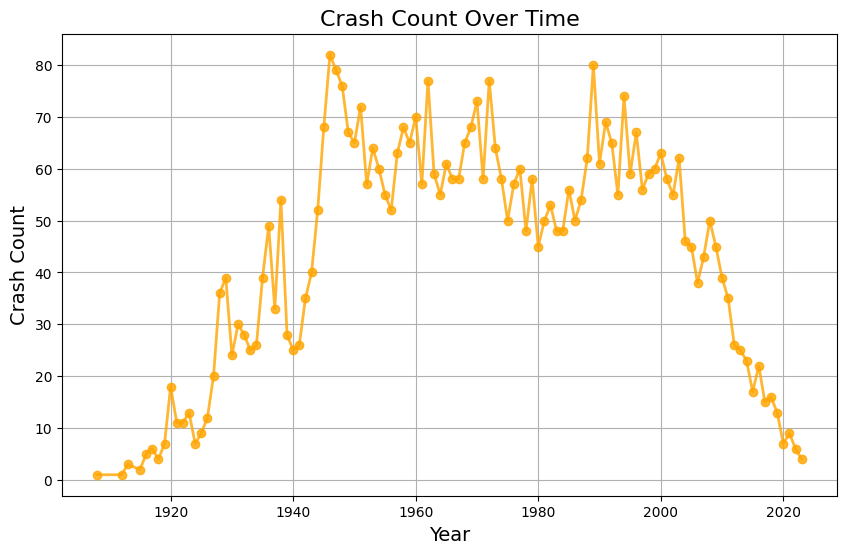

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(df_year_count['Date'], df_year_count['Crash Count'], linestyle='-', linewidth=2,color='orange', marker='o', markersize=6, alpha=0.8)
plt.title('Crash Count Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Crash Count', fontsize=14)
plt.grid(True)
plt.show()
plt

The graph shows that the main number of plane crashes occurred in the period from the late 30s up to the 2010s. It was only by 2020 that the number of plane crashes began to decrease sharply. I think this is due to the active development of aviation since the 30s of the last century, for which the Second World War became an additional booster.  Perhaps it is only by now that aviation has been able to achieve more reliable systems

In [23]:
df_countries = df.groupby('Location').size().reset_index(name='Crash Count').sort_values(by='Crash Count', ascending=False).head(10)
df_countries

,Location,Crash Count
1547,"Moscow, Russia",16
1408,"Manila, Philippines",15
3583,"Sao Paulo, Brazil",13
2826,"New York, New York",13
422,"Cairo, Egypt",13
336,"Bogota, Colombia",12
3462,"Rio de Janeiro, Brazil",12
3793,"Tehran, Iran",10
2355,"Near Moscow, Russia",10
534,"Chicago, Illinois",10


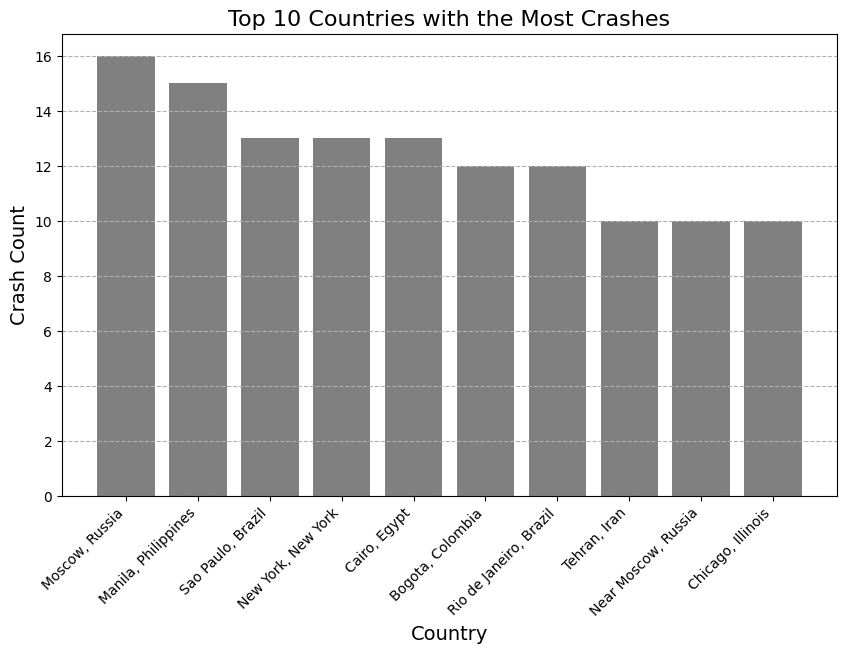

In [24]:


plt.figure(figsize=(10, 6))
plt.bar(df_countries['Location'], df_countries['Crash Count'], color='grey')
plt.title('Top 10 Countries with the Most Crashes', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Crash Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.show()

The first place in the ranking is not something Moscow should be proud of. We can safely add another 10  to the top 16 that are "near Moscow" since all international and national airports are located outside the city. Of course, the top 10 also includes large cities, most of which are capital cities.

I was wondering what brings my hometown down so much - the wonders of the Soviet aviation industry or foreign planes

In [25]:
df_moscow = df[df['Location'].str.contains('Moscow')]
df_moscow['AC Type'].unique()

array(['Tupolev ANT-20 / I-5', 'Antonov AN-9', 'Ilyushin P-14',
       'Ilushin Il-14', 'Ilyushin IL-14P', 'Vickers Viscount 837',
       'Tupolev TU-104B', 'Tupolev Tu-114', 'Tupolev Tu-114D',
       'Tupolev TU-114B', 'MiG-15 UTI', 'Ilyushin IL-18',
       'Ilyushin IL-62', 'McDonnell Douglas DC-8-62', 'Ilyushin IL-18V',
       'Tupolev TU-124', 'Ilyushin IL-62M', 'Ilyushin 114T',
       'Yakovlev YAK-40', 'Ilyushin IL-76', 'Iluyshin Il-86',
       'Antonov AN-12BP', 'Tupolev Tu-154M', 'Tupolev TU-204-100V',
       'Sukhoi Superjet-100-95B'], dtype=object)

It seems that almost all crafts , except for one Russian or Soviet -made

I decided to separate large planes from small by the number of seats

# CIVIL AIRLINES

In [26]:
civil_aircraft = df[(df['Flight Type'] == 'Civil Airlines') & (df['Aboard'] > 30)]
civil_aircraft

,Date,Time,Location,Operator,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary,Flight Type
371,1935,0:45,"Near Moscow, Russia",gor'ky eskadril'ya,Demonstration,Tupolev ANT-20 / I-5,CCCP-I20,Unknown,50.0,37.0,13.0,50.0,37.0,13.0,2.0,"Midair collision with an I-5 fighter at 2,300 ...",Civil Airlines
461,1937,19:25,"Lakehurst, New Jersey",deutsche zeppelin reederei,Frankfurt - Lakehurst N.J.,Zeppelin LZ-129,D-LZ-129,D-LZ129,97.0,36.0,61.0,35.0,13.0,22.0,1.0,The airship Hindenburg caught fire and burned ...,Civil Airlines
620,1941,5:55,"Chardzhou, Turkmenistan",aeroflot,Chardzhou - Urgench,Tupolev ANT-6,CP-L2010,61,36.0,31.0,5.0,7.0,5.0,2.0,0.0,"During the initial climb at night, the pilot i...",Civil Airlines
622,1941,11:26,"Baiserke, Kazakhstan",aeroflot,Almaty - Karaganda - Aktyubinsk - Kuybyshev - ...,Tupolev ANT-6,CCCP-L3043,22182,34.0,28.0,6.0,26.0,21.0,5.0,0.0,The crew decided to takeoff in below-minima we...,Civil Airlines
651,1942,19:05,"Botwood, Newfoundland",american export airlines,"New York - Botwood - Foynes, Ireland",Sirkorsky 44A (flying boat),NC41880,4401,37.0,26.0,11.0,11.0,6.0,5.0,0.0,"While attempting to takeoff, aircraft porpoise...",Civil Airlines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4979,2021,14:40,"Near Jakarta, Indonesia",sriwijaya air,Jakarta - Pontianak,Boeing 737-524,PK-CLC,27323/2616,62.0,56.0,6.0,62.0,56.0,6.0,0.0,Sriwijaya Air flight 182 was climbing through ...,Civil Airlines
4988,2022,6:22,"Wuzhou, Guangxi, China",china eastern airlines,Kunming - Guangzhou,Boeing 737-89P WL,B-1791,41474/5453,132.0,123.0,9.0,132.0,123.0,9.0,0.0,"Flying at 29,098 feet, the jetliner started de...",Civil Airlines
4991,2022,8:53,"Bukoba, Tanzania",precision air,Dar es-Salaam -Bukoba,ATR 42-500,5H-PWF,819,43.0,39.0,4.0,19.0,17.0,2.0,0.0,"While on final approach to Bukoba Airport, the...",Civil Airlines
4992,2022,15:11,"Lima, Peru",latam,Lima - Juliaca,Airbus 320-271N,CC-BHB,7864,108.0,102.0,6.0,0.0,0.0,0.0,0.0,The Airbus A320 collided with a fire truck whi...,Civil Airlines


In [27]:
civil_aircraft.isnull().sum()  #check if nan

,0
Date,0
Time,137
Location,0
Operator,0
Route,27
AC Type,0
Registration,0
cn/ln,0
Aboard,0
Aboard Passangers,6


In [28]:
civil_aircraft = civil_aircraft.dropna(    #clean
    subset=['Aboard Passangers', 'Aboard Crew', 'Fatalities Passangers', 'Fatalities Crew'],
    axis=0)

In [29]:
civil_aircraft['Survivors'] = civil_aircraft['Aboard'] - civil_aircraft['Fatalities']    #add survivors

<ipython-input-29-abd2ce1eac4f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  civil_aircraft['Survivors'] = civil_aircraft['Aboard'] - civil_aircraft['Fatalities']    #add survivors


In [30]:
civil_aircraft['Survival Rate (%)'] = (civil_aircraft['Survivors'] / civil_aircraft['Aboard']) * 100 #and rate

<ipython-input-30-027deb1155a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  civil_aircraft['Survival Rate (%)'] = (civil_aircraft['Survivors'] / civil_aircraft['Aboard']) * 100 #and rate


In [31]:
civil_aircraft['Survival Rate (%)'] = civil_aircraft['Survival Rate (%)'].round(2)

<ipython-input-31-feeb45bd1b33>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  civil_aircraft['Survival Rate (%)'] = civil_aircraft['Survival Rate (%)'].round(2)


In [32]:
civil_aircraft.head()

,Date,Time,Location,Operator,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary,Flight Type,Survivors,Survival Rate (%)
371,1935,0:45,"Near Moscow, Russia",gor'ky eskadril'ya,Demonstration,Tupolev ANT-20 / I-5,CCCP-I20,Unknown,50.0,37.0,13.0,50.0,37.0,13.0,2.0,"Midair collision with an I-5 fighter at 2,300 ...",Civil Airlines,0.0,0.00
461,1937,19:25,"Lakehurst, New Jersey",deutsche zeppelin reederei,Frankfurt - Lakehurst N.J.,Zeppelin LZ-129,D-LZ-129,D-LZ129,97.0,36.0,61.0,35.0,13.0,22.0,1.0,The airship Hindenburg caught fire and burned ...,Civil Airlines,62.0,63.92
620,1941,5:55,"Chardzhou, Turkmenistan",aeroflot,Chardzhou - Urgench,Tupolev ANT-6,CP-L2010,61,36.0,31.0,5.0,7.0,5.0,2.0,0.0,"During the initial climb at night, the pilot i...",Civil Airlines,29.0,80.56
622,1941,11:26,"Baiserke, Kazakhstan",aeroflot,Almaty - Karaganda - Aktyubinsk - Kuybyshev - ...,Tupolev ANT-6,CCCP-L3043,22182,34.0,28.0,6.0,26.0,21.0,5.0,0.0,The crew decided to takeoff in below-minima we...,Civil Airlines,8.0,23.53
651,1942,19:05,"Botwood, Newfoundland",american export airlines,"New York - Botwood - Foynes, Ireland",Sirkorsky 44A (flying boat),NC41880,4401,37.0,26.0,11.0,11.0,6.0,5.0,0.0,"While attempting to takeoff, aircraft porpoise...",Civil Airlines,26.0,70.27


In [33]:
top_operators = civil_aircraft['Operator'].value_counts().head(20).index            #find the top 20 airlines
top_operators

Index(['aeroflot', 'pan american world airways', 'air france',
       'united air lines', 'american airlines', 'philippine air lines',
       'indian airlines', 'trans world airlines', 'eastern air lines',
       'klm royal dutch airlines', 'garuda indonesia airlines',
       'british european airways', 'varig', 'cubana de aviacion',
       'northwest orient airlines', 'pakistan international airlines',
       'korean airlines', 'balkan bulgarian airlines',
       'turkish airlines (thy)', 'china airlines (taiwan)'],
      dtype='object', name='Operator')

In [34]:
top_20_df = civil_aircraft[civil_aircraft['Operator'].isin(top_operators)]
top_20_df['Crash Count'] = top_20_df['Operator'].map(top_20_df['Operator'].value_counts())  #count crashes
top_20_df

<ipython-input-34-70f4877aaee7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20_df['Crash Count'] = top_20_df['Operator'].map(top_20_df['Operator'].value_counts())  #count crashes


,Date,Time,Location,Operator,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary,Flight Type,Survivors,Survival Rate (%),Crash Count
620,1941,5:55,"Chardzhou, Turkmenistan",aeroflot,Chardzhou - Urgench,Tupolev ANT-6,CP-L2010,61,36.0,31.0,5.0,7.0,5.0,2.0,0.0,"During the initial climb at night, the pilot i...",Civil Airlines,29.0,80.56,120
622,1941,11:26,"Baiserke, Kazakhstan",aeroflot,Almaty - Karaganda - Aktyubinsk - Kuybyshev - ...,Tupolev ANT-6,CCCP-L3043,22182,34.0,28.0,6.0,26.0,21.0,5.0,0.0,The crew decided to takeoff in below-minima we...,Civil Airlines,8.0,23.53,120
658,1942,NaN,"Near Tashkent, Russia",aeroflot,Chardzhou - Tashkent,Tupolev A.N.T. 20bis,SSSR-L-760,Unknown,36.0,30.0,6.0,36.0,30.0,6.0,0.0,"While attempting to land, the attitude of the ...",Civil Airlines,0.0,0.00,120
669,1943,6:47,"Lisbon, Portugal",pan american world airways,New York - Hamilton - Horta - Lisbon - Marseille,Boeing B-314 (flying boat),NC18603,1990,39.0,33.0,6.0,25.0,20.0,5.0,0.0,Crashed into the Tagus River in poor weather w...,Civil Airlines,14.0,35.90,25
730,1944,13:20,"Off Antilla, Cuba",pan american world airways,San Juan - Antilla - Miami,Sikorsky S-42 (flying boat),NC823M,4201,31.0,26.0,5.0,17.0,17.0,0.0,0.0,Crashed during the third attempt to lift from ...,Civil Airlines,14.0,45.16,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4578,2006,12:05,"Multan, Pakistan",pakistan international airlines,Multan - Lahore,Fokker F-27 Friendship 200,AP-BAL,10243,45.0,41.0,4.0,45.0,41.0,4.0,0.0,"The plane lost an engine during take off, stru...",Civil Airlines,0.0,0.00,9
4601,2007,7:14,"Yogyakarta, Indonesia",garuda indonesia airlines,Jakarta - Yogyakarta,Boeing B-737-497,PK-GZC,25664/2393,140.0,133.0,7.0,22.0,21.0,1.0,0.0,"While attempting to land, the plane overshot t...",Civil Airlines,118.0,84.29,10
4679,2008,3:15,"Perm, Russia",aeroflot,Moscow - Perm,Boeing B-737-505,VP-BKO,25792/2353,88.0,82.0,6.0,88.0,82.0,6.0,0.0,The aircraft crashed into a ravine adjacent to...,Civil Airlines,0.0,0.00,120
4710,2009,0:15,"Atlantic Ocean, 570 miles northeast of Natal, ...",air france,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,216.0,12.0,228.0,216.0,12.0,0.0,The Airbus went missing over the Atlantic Ocea...,Civil Airlines,0.0,0.00,24


In [35]:
top20_civil = top_20_df.groupby('Operator').agg({
    'Aboard': 'sum',
    'Fatalities': 'sum',
    'Survivors': 'sum',
    'Survival Rate (%)': 'mean',
    'Crash Count': 'count'
}).reset_index().sort_values(by='Crash Count', ascending=False)
top20_civil

,Operator,Aboard,Fatalities,Survivors,Survival Rate (%),Crash Count
0,aeroflot,8830.0,6680.0,2150.0,22.252083,120
14,pan american world airways,2864.0,1147.0,1717.0,45.459200,25
1,air france,2225.0,1387.0,838.0,25.357500,24
18,united air lines,2183.0,773.0,1410.0,39.349048,21
2,american airlines,1789.0,1156.0,633.0,45.272353,17
15,philippine air lines,1468.0,285.0,1183.0,58.684118,17
9,indian airlines,1250.0,687.0,563.0,33.581333,15
16,trans world airlines,1553.0,760.0,793.0,41.258571,14
7,eastern air lines,1114.0,570.0,544.0,43.947500,12
10,klm royal dutch airlines,519.0,429.0,90.0,21.341000,10


**Statistical analyses**

In [42]:
#Survival analysis crashes and survival rate

#To test the hypothesis that a higher number of crashes (Crash Count) is associated with a lower average survival rate (Survival Rate).
#Spearman Correlation: This method measures the strength and direction of the monotonic relationship between two variables.

from scipy.stats import ttest_ind
from scipy.stats import spearmanr

#H0 - There is no any correlation between number of crashes and survival rate
#H1 - The higher the number of accidents an airline has, the lower the average Survival Rate.


correlation, p_value = spearmanr(top20_civil['Crash Count'], top20_civil['Survival Rate (%)'])
print("Spearman's correlation coefficient:", correlation)
print("p-value:", p_value)


#There is no strong or significant evidence to suggest that the number of crashes has a meaningful impact on the survival rate.






Spearman's correlation coefficient: 0.13531798855047975
p-value: 0.5694773116905463


In [36]:
scatter = px.scatter(
    data_frame=top20_civil,
    x='Aboard',
    y='Fatalities',
    color='Survival Rate (%)',
    size='Crash Count',
    hover_name='Operator',
    title="Relationship between Aboard, Fatalities, and Survival Rate"
)

scatter.show()

The graph shows that the main Russian airline is again in the lead. The chances of surviving a crash are not very high - 22%.
The Turkish airline had the most fatal crashes - 9% survival rate

By the way, Asian airlines are the leaders in terms of survival, several airlines from this region have the highest survival rating

Reasons:
Most of the accidents occurred during the Soviet era, when Aeroflot was a monopolist and the largest airline in the world.

Soviet aviation suffered from outdated equipment, limited access to modern technology and less attention to safety issues.

An interesting fact: In the post-Soviet period, the number of accidents decreased dramatically, and Aeroflot became one of the safest airlines in the world. #from internet
lets check!

In [60]:
aeroflot_df = civil_aircraft[civil_aircraft['Operator'] == 'aeroflot']
aeroflot_df

,Date,Time,Location,Operator,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary,Flight Type,Survivors,Survival Rate (%)
620,1941,5:55,"Chardzhou, Turkmenistan",aeroflot,Chardzhou - Urgench,Tupolev ANT-6,CP-L2010,61,36.0,31.0,5.0,7.0,5.0,2.0,0.0,"During the initial climb at night, the pilot i...",Civil Airlines,29.0,80.56
622,1941,11:26,"Baiserke, Kazakhstan",aeroflot,Almaty - Karaganda - Aktyubinsk - Kuybyshev - ...,Tupolev ANT-6,CCCP-L3043,22182,34.0,28.0,6.0,26.0,21.0,5.0,0.0,The crew decided to takeoff in below-minima we...,Civil Airlines,8.0,23.53
658,1942,NaN,"Near Tashkent, Russia",aeroflot,Chardzhou - Tashkent,Tupolev A.N.T. 20bis,SSSR-L-760,Unknown,36.0,30.0,6.0,36.0,30.0,6.0,0.0,"While attempting to land, the attitude of the ...",Civil Airlines,0.0,0.00
1706,1958,22:20,"Near Chita, Russia",aeroflot,Khabarovsk - Irkutsk,Tupolev TU-104-A,CCCP-L5442,7350303,64.0,54.0,10.0,64.0,54.0,10.0,0.0,The aircraft stalled after flying over a thund...,Civil Airlines,0.0,0.00
1720,1958,21:30,"Near Kanash, Russia",aeroflot,Peking - Moscow,Tupolev TU-104A,CCCP-42362,86601002,80.0,71.0,9.0,80.0,71.0,9.0,0.0,The plane was on a flight from Peking to Mosco...,Civil Airlines,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3675,1991,11:37,"Navoi, Uzbekistan",aeroflot,Trashkent - Navoi,Antonov AN-24B,CCCP-46472,27307910,63.0,59.0,4.0,34.0,30.0,4.0,0.0,The aircraft overran the runway and crashed in...,Civil Airlines,29.0,46.03
3684,1991,13:06,"Leningrad, USSR",aeroflot,Sukhumi - \tSt. Petersburg,Tupolev TU-154B-1,CCCP-85097,97,181.0,174.0,7.0,13.0,13.0,0.0,0.0,Undershot the runway and broke in half after a...,Civil Airlines,168.0,92.82
3718,1991,13:42,"Makhackala, Russia",aeroflot,Ellsta - Makhackala,Yakovlev YAK-40,CCCP-87526,9520841,51.0,47.0,4.0,51.0,47.0,4.0,0.0,Crashed into a mountain during daytime in poor...,Civil Airlines,0.0,0.00
3766,1992,22:44,"Near Ivanovo, Russia",aeroflot,Donetsk - Ivanovo,Tupolev TU-134A,CCCP-65058,49868/3910,84.0,77.0,7.0,84.0,77.0,7.0,0.0,The aircraft crashed 1.5 miles from the airpor...,Civil Airlines,0.0,0.00


In [61]:
year_aeroflot = aeroflot_df.groupby('Date').size().reset_index(name='Crash Count')
year_aeroflot

,Date,Crash Count
0,1941,2
1,1942,1
2,1958,2
3,1959,1
4,1960,3
5,1961,3
6,1962,6
7,1963,5
8,1964,1
9,1965,3


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

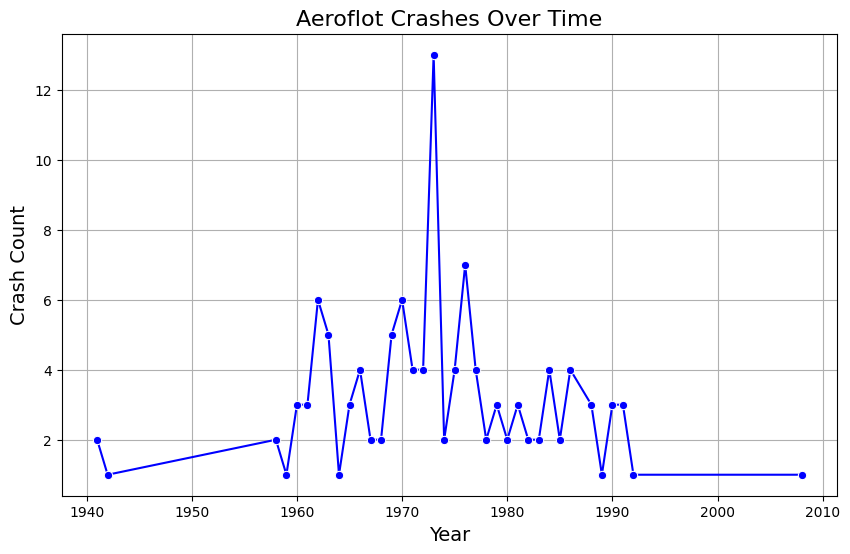

In [62]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=year_aeroflot, x='Date', y='Crash Count', color='blue', marker='o', linestyle='-')
sns.set_style("whitegrid")
plt.title('Aeroflot Crashes Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Crash Count', fontsize=14)
plt.grid(True)
plt

I decided to double-check the data and indeed, since the collapse of the USSR, the number of accidents has decreased significantly

# Survival rate on different aircraft

AC TYPES

In [44]:
ac_types = df['AC Type'].value_counts().head(10)
ac_types

,count
AC Type,
Douglas DC-3,322
de Havilland Canada DHC-6 Twin Otter 300,82
Douglas C-47A,70
Douglas C-47,60
Douglas DC-4,38
Yakovlev YAK-40,35
Antonov AN-26,35
Junkers JU-52/3m,29
Douglas DC-6B,27


In [45]:
ac_types_df = df[df['AC Type'].isin(ac_types.index)]
ac_types_df

,Date,Time,Location,Operator,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary,Flight Type
23,1918,NaN,"Elizabeth, New Jersey",us aerial mail service,NaN,De Havilland DH-4,97,Unknown,1.0,0.0,1.0,1.0,0.0,1.0,0.0,Carl Smith was killed when his mail plane feet...,Cargo
24,1919,NaN,"Cleveland, Ohio",us aerial mail service,NaN,De Havilland DH-4,61,Unknown,1.0,0.0,1.0,1.0,0.0,1.0,0.0,Caught fire in midair. The pilot leaped from t...,Cargo
25,1919,NaN,"Dix Run, Pennsylvania",us aerial mail service,NaN,De Havilland DH-4,82,Unknown,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The mail plane crashed under unknown circumsta...,Cargo
30,1919,NaN,"English Channel off Forkstone, Kent",aircraft transport and travel,NaN,De Havilland DH-4,G-EAHG,Unknown,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Crashed into the sea while attempting to land ...,Military
33,1920,NaN,"New Paris, Indiana",us aerial mail service,NaN,De Havilland DH-4,65,Unknown,1.0,0.0,1.0,1.0,0.0,1.0,0.0,"While on a a mail flight, the aircraft hit tre...",Cargo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4865,2014,13:15,"Sandhikhark, Nepal",nepal airlines,Kathmandu - Pokhara - Jumla,de Havilland Canada DHC-6 Twin Otter 300,9N-ABB,302,18.0,15.0,3.0,18.0,15.0,3.0,0.0,The passenger plane crashed into a snow covere...,Civil Airlines
4882,2014,9:35,"Near Port Moresby, Papua New Guinea",hevlift,Woitape - Port Moresby,de Havilland Canada DHC-6 Twin Otter 300,P2-KSV,528,9.0,7.0,2.0,4.0,2.0,2.0,0.0,While approaching Port Moresby Jacksons Intern...,Civil Airlines
4908,2016,9:05,"Cox's Bazar, Bangladesh",true aviation ltd.,Cox's Bazar - Jessore,Antonov AN-26,S2-AGZ,13408,4.0,0.0,4.0,3.0,0.0,3.0,0.0,"The cargo plane, carrying shrimp, crashed less...",Civil Airlines
4960,2019,10:40,"Vereda La Bendicion, Colombia",laser aereo colombia,San Jose - Villavicencio,Douglas DC-3,HK-2494,:33105/16357,14.0,11.0,3.0,14.0,11.0,3.0,0.0,"While on approach to land, the crew contacted ...",Civil Airlines


In [46]:
ac_types_df['Crash Count'] = ac_types_df['AC Type'].map(ac_types_df['AC Type'].value_counts())
ac_types_df['Survival Rate (%)'] = ((ac_types_df['Aboard'] - ac_types_df['Fatalities'])/ ac_types_df['Aboard']) * 100
ac_types_df

<ipython-input-46-8f73e633529f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-46-8f73e633529f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Time,Location,Operator,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary,Flight Type,Crash Count,Survival Rate (%)
23,1918,NaN,"Elizabeth, New Jersey",us aerial mail service,NaN,De Havilland DH-4,97,Unknown,1.0,0.0,1.0,1.0,0.0,1.0,0.0,Carl Smith was killed when his mail plane feet...,Cargo,26,0.000000
24,1919,NaN,"Cleveland, Ohio",us aerial mail service,NaN,De Havilland DH-4,61,Unknown,1.0,0.0,1.0,1.0,0.0,1.0,0.0,Caught fire in midair. The pilot leaped from t...,Cargo,26,0.000000
25,1919,NaN,"Dix Run, Pennsylvania",us aerial mail service,NaN,De Havilland DH-4,82,Unknown,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The mail plane crashed under unknown circumsta...,Cargo,26,0.000000
30,1919,NaN,"English Channel off Forkstone, Kent",aircraft transport and travel,NaN,De Havilland DH-4,G-EAHG,Unknown,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Crashed into the sea while attempting to land ...,Military,26,NaN
33,1920,NaN,"New Paris, Indiana",us aerial mail service,NaN,De Havilland DH-4,65,Unknown,1.0,0.0,1.0,1.0,0.0,1.0,0.0,"While on a a mail flight, the aircraft hit tre...",Cargo,26,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4865,2014,13:15,"Sandhikhark, Nepal",nepal airlines,Kathmandu - Pokhara - Jumla,de Havilland Canada DHC-6 Twin Otter 300,9N-ABB,302,18.0,15.0,3.0,18.0,15.0,3.0,0.0,The passenger plane crashed into a snow covere...,Civil Airlines,82,0.000000
4882,2014,9:35,"Near Port Moresby, Papua New Guinea",hevlift,Woitape - Port Moresby,de Havilland Canada DHC-6 Twin Otter 300,P2-KSV,528,9.0,7.0,2.0,4.0,2.0,2.0,0.0,While approaching Port Moresby Jacksons Intern...,Civil Airlines,82,55.555556
4908,2016,9:05,"Cox's Bazar, Bangladesh",true aviation ltd.,Cox's Bazar - Jessore,Antonov AN-26,S2-AGZ,13408,4.0,0.0,4.0,3.0,0.0,3.0,0.0,"The cargo plane, carrying shrimp, crashed less...",Civil Airlines,35,25.000000
4960,2019,10:40,"Vereda La Bendicion, Colombia",laser aereo colombia,San Jose - Villavicencio,Douglas DC-3,HK-2494,:33105/16357,14.0,11.0,3.0,14.0,11.0,3.0,0.0,"While on approach to land, the crew contacted ...",Civil Airlines,322,0.000000


In [47]:
ac_types_df = ac_types_df.dropna(    #clean
    subset=['Aboard Passangers', 'Aboard Crew', 'Fatalities Passangers', 'Fatalities Crew', 'Survival Rate (%)'],
    axis=0)

In [48]:
ac_types_df.isnull().sum()

,0
Date,0
Time,279
Location,0
Operator,0
Route,114
AC Type,0
Registration,0
cn/ln,0
Aboard,0
Aboard Passangers,0


In [49]:
aircrafts = ac_types_df.groupby('AC Type').agg({
    'Aboard': 'sum',
    'Fatalities': 'sum',
    'Crash Count': 'count',
    'Survival Rate (%)': 'mean'
})
aircrafts

,Aboard,Fatalities,Crash Count,Survival Rate (%)
AC Type,,,,
Antonov AN-26,994.0,904.0,31,8.241356
De Havilland DH-4,26.0,25.0,25,2.000000
Douglas C-47,987.0,933.0,56,7.062156
Douglas C-47A,621.0,564.0,69,10.519919
Douglas DC-3,5807.0,4490.0,308,20.233605
Douglas DC-4,1133.0,873.0,37,19.377141
Douglas DC-6B,1323.0,1051.0,27,19.399971
Junkers JU-52/3m,344.0,237.0,28,27.160698
Yakovlev YAK-40,1085.0,779.0,35,27.691165


**Statistical analisys**

In [50]:
#check the normal distribution

from scipy.stats import shapiro

#H0 - The data is normally distributed
#H1 - The data is not normally distributed

for column in aircrafts.columns:
    statistic, p_value = shapiro(aircrafts[column])
    print(f"Column: {column}")
    print(f"Statistic: {statistic}")
    print(f"p-value: {p_value}")

Column: Aboard
Statistic: 0.6058621415827583
p-value: 6.496462183272904e-05
Column: Fatalities
Statistic: 0.612852442560789
p-value: 7.87301428743374e-05
Column: Crash Count
Statistic: 0.5569718951299603
p-value: 1.70500794414082e-05
Column: Survival Rate (%)
Statistic: 0.9151762697996507
p-value: 0.31847126609511855


Almost all the data is not distributed normally

In [57]:
#Checking the differences in Survival Rate between different types of aircraft

from scipy.stats import kruskal

#H0 - The average Survival Rate not varies for different types of aircraft.
# H1 - The average Survival Rate varies for different types of aircraft.


survival = aircrafts['Survival Rate (%)']
survival = dict(survival) # Survival Rates by aircraft type

groups = [values for values in survival.values()]

# Perform Kruskal-Wallis test
stat, p_value = kruskal(*groups)

print(f"Kruskal-Wallis Statistic: {stat}, P-value: {p_value}")


Kruskal-Wallis Statistic: 9.0, P-value: 0.43727418891386693


There are no statistically significant differences in survival between aircraft

In [58]:
aircrafts_reset = aircrafts.reset_index().sort_values(by='Crash Count', ascending=False)
aircrafts_reset

,AC Type,Aboard,Fatalities,Crash Count,Survival Rate (%)
4,Douglas DC-3,5807.0,4490.0,308,20.233605
9,de Havilland Canada DHC-6 Twin Otter 300,1174.0,832.0,82,25.357696
3,Douglas C-47A,621.0,564.0,69,10.519919
2,Douglas C-47,987.0,933.0,56,7.062156
5,Douglas DC-4,1133.0,873.0,37,19.377141
8,Yakovlev YAK-40,1085.0,779.0,35,27.691165
0,Antonov AN-26,994.0,904.0,31,8.241356
7,Junkers JU-52/3m,344.0,237.0,28,27.160698
6,Douglas DC-6B,1323.0,1051.0,27,19.399971
1,De Havilland DH-4,26.0,25.0,25,2.000000


In [59]:
fig = px.bar(
    aircrafts_reset,
    x='AC Type',
    y='Crash Count',
    color='Survival Rate (%)',
    hover_data=['Aboard', 'Fatalities'],
    title="Crash Count by Aircraft Type",
    labels={'Crash Count': 'Number of Crashes', 'AC Type': 'Aircraft Type'}
)
fig.update_layout(
    xaxis_tickangle=-20,
    xaxis_title_font=dict(size=16),
    yaxis_title_font=dict(size=16),
    title_font=dict(size=24),

                  )

fig.show()


The Douglas DC3 is the leader in the crash rating of aircraft, but this statistic does not tell us at all that this aircraft is not the safest!

This suggests that this plane was very popular!

A little bit from the Internet:

this is a legendary twin-engined piston aircraft developed by the Douglas Aircraft Company in the 1930s. It is considered one of the most successful and influential aircraft in aviation history, having played a key role in the development of both civil and military aviation.

1. More than 16,000 copies (including military versions) were produced.
2. Some specimens are still flying almost 90 years after the first flight.
3. It is known for its ease of control, which made it popular among pilots.

We also found no statistical differences between the survival rating and the types of aircraft. Most likely, in this case, what happened and at what altitude plays a big role